# MIDS W205
## Project 1
### Submitted by: Alissa Stover
### Due: Tuesday February 11th, 2020

## Import Python packages

In [1]:
import pandas as pd # pandas for data manipulation and processing
import numpy as np
%matplotlib inline
import seaborn as sns # seaborn for visualizations

## Data exploration & insights

### What are the 5 most popular commuter trips? 

My definition of a typical commuter trip is as follows:

* Under 45min long -- although there may be some individuals who bike over 45min to work, these would probably represent a different type of commuter outside of the norm 
* Commuter trips are often during rush hour -- during week-days and are between 7-9am or 4-6pm
* Do not have the same start and end point (so they are used to get from one place to another) 
* *Can* include very short trips (e.g., a few minutes long) as long as the start and end point are different -- there could be some very economical commuters who use a bike to shave off a few minutes in their commute getting from point A to B.

There are additional corrections to the start and end station names (see supplementary section below for justification).

In [2]:
%%bigquery commuters_under45
SELECT *,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) THEN "Rush"
           ELSE "Not Rush"
           END AS rush_hour,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,      

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 2700 AND start_station_id != end_station_id


Let's look at some rows...

In [3]:
commuters_under45.filter(["start_date", "end_date", "subscriber_type", "rush_hour", "start_station_name_correct", "end_station_name_correct"]).head()


,start_date,end_date,subscriber_type,rush_hour,start_station_name_correct,end_station_name_correct
0,2015-10-05 16:41:00+00:00,2015-10-05 16:51:00+00:00,Subscriber,Rush,Sequoia Hospital,Mezes Park
1,2015-12-04 17:32:00+00:00,2015-12-04 17:37:00+00:00,Subscriber,Rush,Redwood City Caltrain Station,Mezes Park
2,2015-09-30 09:59:00+00:00,2015-09-30 10:02:00+00:00,Subscriber,Rush,Redwood City Caltrain Station,Mezes Park
3,2015-10-27 17:32:00+00:00,2015-10-27 17:38:00+00:00,Subscriber,Rush,Redwood City Caltrain Station,Mezes Park
4,2015-11-13 17:09:00+00:00,2015-11-13 17:15:00+00:00,Subscriber,Rush,Redwood City Caltrain Station,Mezes Park


550,130 rides fit our definition of a commuter trip: 

In [4]:
commuters_under45.shape

(550130, 14)

Let's look at the top 5 station combinations that fit our time limit conditions and our definition of a commuter trip:

In [5]:
%%bigquery top_5_commuter_trips
SELECT start_station_id, end_station_id, start_station_name, end_station_name, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
COUNT(*) as trip_freq 

FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 2700 AND start_station_id != end_station_id
GROUP BY start_station_id, end_station_id, start_station_name, end_station_name
ORDER BY trip_freq DESC 
LIMIT 5

In [6]:
top_5_commuter_trips.filter(["start_station_name_correct", "end_station_name_correct", "trip_freq"])


,start_station_name_correct,end_station_name_correct,trip_freq
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5163
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5120
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,5028
3,Embarcadero at Sansome,Steuart at Market,4891
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4750


In [7]:
# add a column to record the start and end station names in one cell for easier plotting.
top_5_commuter_trips["trip"] = top_5_commuter_trips["start_station_name_correct"] + " to " + top_5_commuter_trips["end_station_name_correct"]



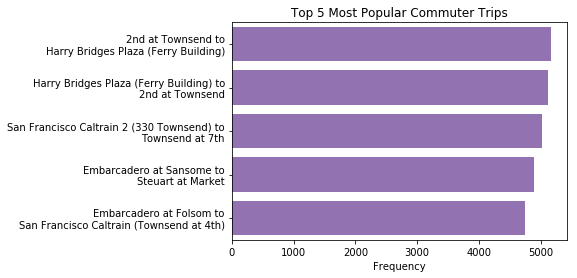

In [8]:
ax = sns.barplot(top_5_commuter_trips["trip_freq"], top_5_commuter_trips["trip"], color = 'tab:purple')
ax.set(xlabel = "Frequency", ylabel = "", title = "Top 5 Most Popular Commuter Trips")
ax.set_yticklabels(top_5_commuter_trips["start_station_name_correct"] + " to\n" + top_5_commuter_trips["end_station_name_correct"]);


## What are recommendations for offers?

### Is the Subscription offer sufficient for commuter riders? 

#### What are some differences in commuter trips for subscribers versus other customers?

The below analysis was used to identify whether the existing subscription offer was meeting the needs of regular commuter riders. Based on these findings, it appears that the subscription is a desirable offer for thes riders. 

In [9]:
%%bigquery top_5_commuter_trips_subscribers
SELECT start_station_id, end_station_id, start_station_name, end_station_name, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
COUNT(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Subscriber" AND EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 2700 AND start_station_id != end_station_id
GROUP BY start_station_id, end_station_id, start_station_name, end_station_name
ORDER BY trip_freq DESC 
LIMIT 5

In [10]:
top_5_commuter_trips_subscribers.filter(["start_station_name_correct", "end_station_name_correct", "trip_freq"])

,start_station_name_correct,end_station_name_correct,trip_freq
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5032
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4970
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,4948
3,Embarcadero at Sansome,Steuart at Market,4685
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4683


In [11]:
# add a column to record the start and end station names in one cell for easier plotting.
top_5_commuter_trips_subscribers["trip"] = top_5_commuter_trips_subscribers["start_station_name_correct"] + " to " + top_5_commuter_trips_subscribers["end_station_name_correct"]


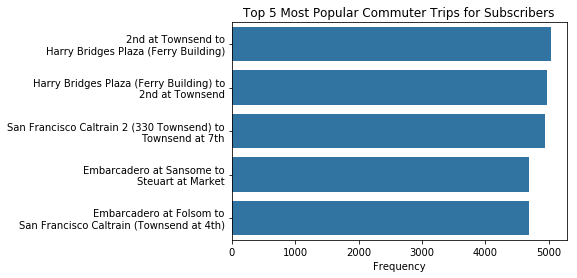

In [12]:
ax = sns.barplot(top_5_commuter_trips_subscribers["trip_freq"], top_5_commuter_trips_subscribers["trip"], color = 'tab:blue')
ax.set(xlabel = "Frequency", ylabel = "", title = "Top 5 Most Popular Commuter Trips for Subscribers")
ax.set_yticklabels(top_5_commuter_trips_subscribers["start_station_name_correct"] + " to\n" + top_5_commuter_trips_subscribers["end_station_name_correct"]);


In [13]:
%%bigquery top_5_commuter_trips_customers
SELECT start_station_id, end_station_id, start_station_name, end_station_name, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
COUNT(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type = "Customer" AND EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 2700 AND start_station_id != end_station_id
GROUP BY start_station_id, end_station_id, start_station_name, end_station_name
ORDER BY trip_freq DESC 
LIMIT 5

In [14]:
top_5_commuter_trips_customers.filter(["start_station_name_correct", "end_station_name_correct", "trip_freq"])


,start_station_name_correct,end_station_name_correct,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,532
1,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),257
2,Embarcadero at Sansome,Steuart at Market,206
3,Embarcadero at Sansome,2nd at Townsend,157
4,Embarcadero at Vallejo,Embarcadero at Sansome,154


In [15]:
# add a column to record the start and end station names in one cell for easier plotting.
top_5_commuter_trips_customers["trip"] = top_5_commuter_trips_customers["start_station_name_correct"] + " to " + top_5_commuter_trips_customers["end_station_name_correct"]


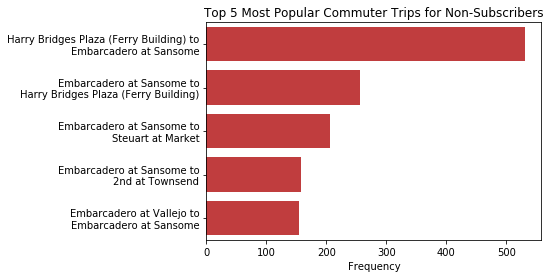

In [16]:
ax = sns.barplot(top_5_commuter_trips_customers["trip_freq"], top_5_commuter_trips_customers["trip"], color = "tab:red")
ax.set(xlabel = "Frequency", ylabel = "", title = "Top 5 Most Popular Commuter Trips for Non-Subscribers")
ax.set_yticklabels(top_5_commuter_trips_customers["start_station_name_correct"] + " to\n" + top_5_commuter_trips_customers["end_station_name_correct"]);


There are 550,130 total commuter trips (as noted above):

In [17]:
%%bigquery 
SELECT COUNT(*),
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 2700 AND start_station_id != end_station_id


,f0_
0,550130


525,561 (96%) of these are taken by subscribed customers.

In [18]:
%%bigquery 
SELECT COUNT(*),
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Subscriber" AND EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 2700 AND start_station_id != end_station_id


,f0_
0,525561


In [19]:
525561/550130

0.955339646992529

### Recommendation for Commuter Rider Offers:

From the above analysis, it is clear that the vast majority of commuter riders are already subscribers! This is great news since it indicates that even for shorter trips (under 45min), people are finding value in the subscription. I recommend that we retain the existing Subscription offers for our commuters. 

### Are there other types of commuters that are using the bikes?

We can see that most of our rides are under 45min. But are there longer rides people are taking during rush hour? 

#### Are commuters who take rides over 45min different from those who take rides under 45min? 

In our above definition of commuter trips, we filtered out trips with the same start and end point. 

However, we could have two groups of people who are using the bikes to commute:

1. People who have relatively shorter rides (under 45min) and rent a bike to get from home to work then rent another bike later in the day to get from work to home.

2. People with much longer rides who rent the bike for the day: they use the bike to get from home to work, park it at work, then take it back to the station later. We will group rides into this category if they are between 6-10 hours long. This would include people who worked a half-day (4 hours), then biked ~1 hour to and from work, as well as people who worked a full-day (8 hours), then biked ~1 hour to and from work. 

Would it make sense to offer a different type of subscription for the latter group?

From the analysis below, we can see that only 20% of the latter group are subscribers -- compared to 96% in the first group. However, the latter group is a very small portion of the data.

In [20]:
%%bigquery commuters_over360
SELECT *,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,      

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec > 21600 AND duration_sec < 36000 AND start_station_id = end_station_id


In [21]:
commuters_over360.filter(["start_date", "end_date", "subscriber_type", "start_station_name_correct", "end_station_name_correct"]).head()


,start_date,end_date,subscriber_type,start_station_name_correct,end_station_name_correct
0,2014-04-10 16:34:00+00:00,2014-04-10 22:46:00+00:00,Customer,MLK Library,MLK Library
1,2013-09-27 09:45:00+00:00,2013-09-27 16:44:00+00:00,Customer,5th at Howard,5th at Howard
2,2013-12-26 08:31:00+00:00,2013-12-26 17:04:00+00:00,Customer,5th at Howard,5th at Howard
3,2014-05-28 09:42:00+00:00,2014-05-28 17:29:00+00:00,Customer,5th at Howard,5th at Howard
4,2013-12-26 08:31:00+00:00,2013-12-26 16:33:00+00:00,Customer,5th at Howard,5th at Howard


There are 116 trips that are over 6 hours (360min) long taken by commuters (who rent and return the bike to the same station and travel during rush hour) -- this is clearly a minority of our rides:

In [22]:
commuters_over360.shape

(116, 13)

Number of commuter trips 6-10 hours (360-600min) long taken by subscribers:

In [23]:
%%bigquery 
SELECT COUNT(*),  

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Subscriber" AND EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec > 21600 AND duration_sec < 36000 AND start_station_id = end_station_id


,f0_
0,23


Proportion of commuter trips 6-10 hours (360-600min) long taken by subscribers = 0.20 = 20% 

In [24]:
23/116

0.19827586206896552

##### What are the popular stations for the latter group (commuters with trips over 6 hours)? How long are their rides? 

In [25]:
%%bigquery top_5_commuter_over360_trips
SELECT start_station_id, start_station_name,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
COUNT(*) as trip_freq 

FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec > 21600 AND duration_sec < 36000 AND start_station_id = end_station_id
GROUP BY start_station_id, start_station_name
ORDER BY trip_freq DESC 
LIMIT 5

A lot of these trips are near other modes of transport (Caltrain, ferry, and bus stations) suggesting that a commuter might come in from another city, take the bike to their office, then return it before returning home via train/ferry/bus.  

In [26]:
top_5_commuter_over360_trips

,start_station_id,start_station_name,start_station_name_correct,trip_freq
0,50,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),9
1,28,Mountain View Caltrain Station,Mountain View Caltrain Station,9
2,74,Steuart at Market,Steuart at Market,8
3,71,Powell at Post (Union Square),Powell at Post (Union Square),7
4,57,5th at Howard,5th at Howard,7


3 of the top 5 start times are in the morning (2 are in the evening).

In [27]:
%%bigquery top_5_commuter_over360_hours
SELECT EXTRACT(HOUR FROM start_date),
COUNT(*) as trip_freq 

FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec > 21600 AND duration_sec < 36000 AND start_station_id = end_station_id
GROUP BY EXTRACT(HOUR FROM start_date)
ORDER BY trip_freq DESC 
LIMIT 5

In [28]:
top_5_commuter_over360_hours

,f0_,trip_freq
0,9,57
1,8,33
2,7,13
3,16,5
4,17,5


A lot of these trips are in a range that would be reasonable to expect if someone rented in the morning then returned the bike at night when done with work.

In [29]:
# Pull out duration and convert to hours
commuters_over360_duration_hr = commuters_over360["duration_sec"]/60/60


/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


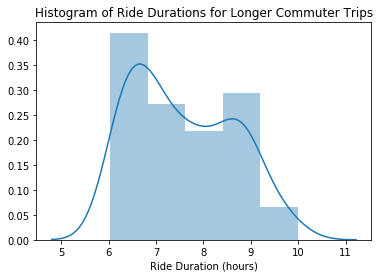

In [30]:
# Plot durations
ax = sns.distplot(commuters_over360_duration_hr)
ax.set(xlabel='Ride Duration (hours)', title = "Histogram of Ride Durations for Longer Commuter Trips");


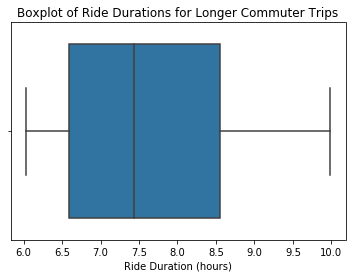

In [31]:
ax = sns.boxplot(commuters_over360_duration_hr)
ax.set(xlabel='Ride Duration (hours)', title = "Boxplot of Ride Durations for Longer Commuter Trips");


**Descriptive Stats:**

In [32]:
commuters_over360_duration_hr.describe()

count    116.000000
mean       7.562471
std        1.068987
min        6.030833
25%        6.587292
50%        7.431944
75%        8.547153
max        9.985000
Name: duration_sec, dtype: float64

### Recommendation for Longer Commuter Subscription

Currently, a customer without a subscription would pay \\$2 for a ride up to 30min and \\$3 per 15min after that. As I defined them, these trips are between 6-10 hours long. This would mean that most customers are paying \\$80 - \\$174 per ride if they are not subscribers. With the existing subscription, they would save some money (depending on how many trips they take per month) but it would still be quite expensive. 

One can imagine that a customer could want to limit the number of their transactions when commuting -- if you already have to get to the train/bus/ferry, then switch to the bike, you might not want to spend that extra time docking the bike. It might be very attractive to just be able to keep the bike all day without having to find and use another docking station. 

Not many customers are using the bikes in this way, but it's possible that we could attract new customers by offering a new subscription type where people could take unlimited rides up to 10 hours for \\$300 per month (with \\$3 additional for every 15min over the 10 hour limit). This might be attractive to commuters who don't want to have to deal with the hassle of upkeep for the bike, or transporting it to SF from where they live via ferry/bus/train. 

However, it is possible that this offer does not fit the Lyft bike model of shorter one-way rides. It would have to be seen whether renting out bikes in this way would allow for Lyft bikes to maintain enough bikes in a given station. Perhaps one potential solution would be to have a fleet of two-stage commute bikes designed for people who have to transfer from train/bus/ferry to bike to get to work. The customers who use the subscription for up to 10 hour rides could be limited to using these bikes so that the other one-way customers would still have bikes available. 

Below, I am using the bikeshare_stations dataset to look at information about these 5 popular bike stations. We can see that the number of bikes at each station ranges from 15-23 -- this is a limited number of bikes for an area as populated as the Bay Area, so if Lyft did want to create this new type of offer they would need to find a way to provide more bikes at each dock. 

In conclusion, I would recommend that Lyft only take on this new market opportunity if they wanted to expand beyond shorter one-way rides. Additional infrastructure would need to be in place to support this change. 


In [34]:
%%bigquery bikeshare_stations
SELECT *,
FROM `bigquery-public-data.san_francisco.bikeshare_stations`

In [35]:
# pull out station IDs
station_id = top_5_commuter_over360_trips["start_station_id"]

In [36]:
station_id

0    50
1    28
2    74
3    71
4    57
Name: start_station_id, dtype: int64

In [37]:
for i in range(0, len(station_id)):
    print(bikeshare_stations["dockcount"][bikeshare_stations["station_id"] == station_id[i]])

61    23
Name: dockcount, dtype: int64
60    23
Name: dockcount, dtype: int64
66    23
Name: dockcount, dtype: int64
54    19
Name: dockcount, dtype: int64
28    15
Name: dockcount, dtype: int64


### Are there patterns by day of week and hour of day?

Let's look at overall patterns by day of week and hour of day. Since this analysis is exploratory, I will use some light cleaning to filter out:

* Rides over 24 hours long -- according to the Lyft bike website, this would incur a \\$1200 fine. I assume that rides over that amount are a mistake on the part of the rider (or an error in the data) and not a desirable ride for either party. 
* Rides under 5min long with the same start and end station -- this probably reflects someone who made a mistake in taking out the bike, or changed their mind immediately (or an error in the data). Again, this does not seem to be a desirable trip for either party. 

In [38]:
%%bigquery week_day_patterns
SELECT *, 
       CASE 
           WHEN (EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18) THEN "Rush"
           ELSE "Not Rush"
           END AS rush_hour,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       EXTRACT(YEAR FROM start_date) AS start_year,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str  

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec < 86400 AND NOT (duration_sec < 300 AND start_station_id = end_station_id)
ORDER BY duration_sec DESC 


5 longest rides:

In [ ]:
week_day_patterns.filter(["duration_sec", "start_station_name_correct", "end_station_name_correct", "dow_str", "dow_weekday", "start_hour_str"]).head()


,duration_sec,start_station_name_correct,end_station_name_correct,dow_str,dow_weekday,start_hour_str
0,86381,San Antonio Caltrain Station,San Antonio Shopping Center,Monday,Weekday,Afternoon
1,86363,Evelyn Park and Ride,Evelyn Park and Ride,Saturday,Weekend,Early Afternoon
2,86345,Harry Bridges Plaza (Ferry Building),Market at 4th,Tuesday,Weekday,Afternoon
3,86325,2nd at Townsend,Washington at Kearny,Saturday,Weekend,Early Afternoon
4,86228,Howard at 2nd,Howard at 2nd,Wednesday,Weekday,Mid Morning


5 shortest rides:

In [ ]:
week_day_patterns.filter(["duration_sec", "start_station_name_correct", "end_station_name_correct", "dow_str", "dow_weekday", "start_hour_str"]).tail()


,duration_sec,start_station_name_correct,end_station_name_correct,dow_str,dow_weekday,start_hour_str
979020,60,South Van Ness at Market,Market at 10th,Tuesday,Weekday,Mid Day
979021,60,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Monday,Weekday,Morning
979022,60,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),Tuesday,Weekday,Morning
979023,60,Post at Kearny,2nd at South Park,Tuesday,Weekday,Evening
979024,60,Howard at 2nd,2nd at South Park,Friday,Weekday,Morning


We can see that there are 868,684 trips taken on weekdays and 110,341 on the weekends. 

That is about 8 times the number of trips during the week -- but there are only 2.5 times more days that are counted as week days.

Since the number of bikes at each station and their overall capacity don't change from weekday to weekend, if you assume the same approximate ride lengths and same patterns of usage across stations, Lyft would have the infrastructure to support many more weekend rides (see analysis below looking at this market opportunity). 

Number of weekday rides:

In [44]:
len(week_day_patterns[week_day_patterns["dow_weekday"] == "Weekday"])

868684

Number of weekend rides:

In [45]:
len(week_day_patterns[week_day_patterns["dow_weekday"] == "Weekend"])

110341

Comparing number of trips on weekdays to number on weekends:

In [42]:
868684/110341

7.872721835038653

Comparing number of days on weekdays to number on weekends:

In [43]:
5/2

2.5

### Is there a market opportunity with weekend riders?

They are the minority of rides -- 110,341 of the rides in the cleaned dataset were taken on the weekend. Since they are on the weekend, most are probably pleasure rides rather than for work so we will take out very short trips (under 5min) which may be a mistake in the data (one would assume a leisurely ride for pleasure wouldn't be under 5min). I also took out rides over 24 hours long (due to the \\$1200 fine for trips over this duration as noted on the Lyft bike website).

In [48]:
%%bigquery weekend_trips
SELECT *, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,      

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec < 86400 AND duration_sec >= 300 AND EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7)
ORDER BY duration_sec DESC 




Let's take a look at some rows:

In [49]:
weekend_trips.filter(["start_date", "end_date", "subscriber_type", "start_station_name_correct", "end_station_name_correct"]).head()


,start_date,end_date,subscriber_type,start_station_name_correct,end_station_name_correct
0,2014-01-25 15:45:00+00:00,2014-01-26 15:44:00+00:00,Customer,Evelyn Park and Ride,Evelyn Park and Ride
1,2016-07-09 16:30:00+00:00,2016-07-10 16:28:00+00:00,Customer,2nd at Townsend,Washington at Kearny
2,2014-08-31 16:13:00+00:00,2014-09-01 16:09:00+00:00,Customer,Market at 10th,Market at 10th
3,2016-07-09 16:33:00+00:00,2016-07-10 16:28:00+00:00,Customer,2nd at Townsend,Washington at Kearny
4,2014-02-15 10:26:00+00:00,2014-02-16 10:19:00+00:00,Customer,Civic Center BART (7th at Market),Civic Center BART (7th at Market)


As noted above, there are 110,341 rides on the weekend:

In [50]:
weekend_trips.shape

(97843, 13)

#### Trip Durations

These trips are usually of a short duration but there are a lot of outliers. 

In [51]:
# Pull out duration and convert to hours
weekend_trips_duration_hr = weekend_trips["duration_sec"]/60/60


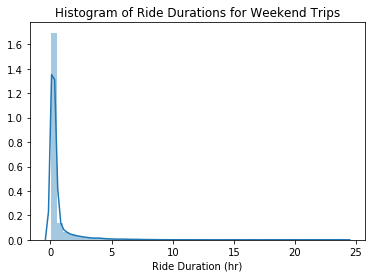

In [52]:
# Plot durations
ax = sns.distplot(weekend_trips_duration_hr)
ax.set(xlabel='Ride Duration (hr)', title = "Histogram of Ride Durations for Weekend Trips");


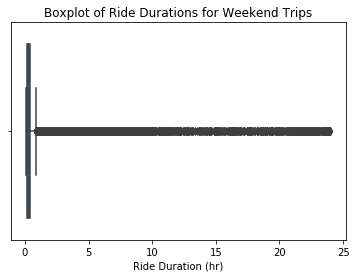

In [54]:
ax = sns.boxplot(weekend_trips_duration_hr)
ax.set(xlabel='Ride Duration (hr)', title = "Boxplot of Ride Durations for Weekend Trips");


**Descriptive Stats:**

In [55]:
weekend_trips_duration_hr.describe()

count    97843.000000
mean         0.662962
std          1.648561
min          0.083333
25%          0.147778
50%          0.234444
75%          0.432222
max         23.989722
Name: duration_sec, dtype: float64

**Are these durations different for weekday trips?**

In the boxplot below comparing the distribution of the duration (in hours) of the rides for weekdays versus weekends, I limited the data to rows with durations under 2 hours long for easier visualization (the many outliers made the actual boxes hard to see). I relaxed my filter on the weekend rides here, using a dataset that has only eliminated trips over 24 hours and those under 5min with the same start & end stations.

We can see that weekend rides are longer on average and also have more variability in their durations. However, like weekday trips many are under 45min long. 

In [56]:
# Pull out duration and convert to hours
week_day_patterns["duration_hr"] = week_day_patterns["duration_sec"]/60/60


In [57]:
# filter data for trips under 2 hours
trips_under2 = week_day_patterns[week_day_patterns["duration_hr"] < 2]

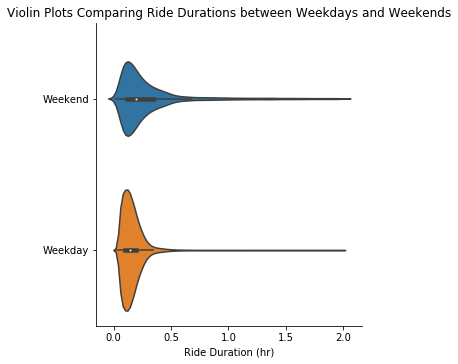

In [58]:
# plot 
ax = sns.catplot(y="dow_weekday", x="duration_hr",
                 kind="violin", data = trips_under2)
ax.set(ylabel = "", xlabel = "Ride Duration (hr)", title = "Violin Plots Comparing Ride Durations between Weekdays and Weekends");


#### Top 5 Weekend Trips

A lot of the most popular weekend trips are along the Embarcadero -- a very popular tourist destination -- which suggests that many of these are pleasure trips.

In [59]:
%%bigquery top_5_weekend_trips
SELECT start_station_id, end_station_id, start_station_name, end_station_name, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
COUNT(*) as trip_freq 

FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) AND duration_sec < 86400 AND duration_sec >= 300 AND start_station_id != end_station_id
GROUP BY start_station_id, end_station_id, start_station_name, end_station_name
ORDER BY trip_freq DESC 
LIMIT 5


In [60]:
top_5_weekend_trips.filter(["start_station_name_correct", "end_station_name_correct", "trip_freq"])

,start_station_name_correct,end_station_name_correct,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,547
1,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),405
2,Embarcadero at Bryant,Embarcadero at Sansome,332
3,Embarcadero at Bryant,Harry Bridges Plaza (Ferry Building),194
4,Embarcadero at Sansome,Steuart at Market,178


In [61]:
%%bigquery embarcadero_weekend_trips
SELECT *, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,      

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE (start_station_name LIKE "%Embarcadero%" OR end_station_name LIKE "%Embarcadeo%") AND duration_sec < 86400 AND duration_sec >= 300 AND EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7)
ORDER BY duration_sec DESC 




In [62]:
embarcadero_weekend_trips.filter(["start_date", "end_date", "subscriber_type", "rush_hour", "start_station_name_correct", "end_station_name_correct"]).head()

,start_date,end_date,subscriber_type,start_station_name_correct,end_station_name_correct
0,2014-09-20 17:32:00+00:00,2014-09-21 17:09:00+00:00,Customer,Embarcadero at Bryant,Embarcadero at Bryant
1,2016-07-16 13:48:00+00:00,2016-07-17 13:26:00+00:00,Customer,Embarcadero at Sansome,Embarcadero at Sansome
2,2015-05-30 16:52:00+00:00,2015-05-31 16:19:00+00:00,Customer,Embarcadero at Folsom,Townsend at 7th
3,2015-06-06 12:04:00+00:00,2015-06-07 11:05:00+00:00,Customer,Embarcadero at Vallejo,Harry Bridges Plaza (Ferry Building)
4,2015-06-06 12:04:00+00:00,2015-06-07 11:04:00+00:00,Customer,Embarcadero at Vallejo,Harry Bridges Plaza (Ferry Building)


In [63]:
# Pull out duration and convert to hours
embarcadero_weekend_trips_hr = embarcadero_weekend_trips["duration_sec"]/60/60


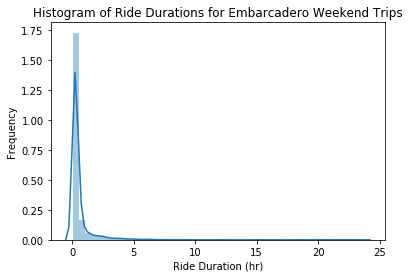

In [64]:
ax = sns.distplot(embarcadero_weekend_trips_hr)
ax.set(xlabel='Ride Duration (hr)', ylabel = 'Frequency', title = "Histogram of Ride Durations for Embarcadero Weekend Trips");


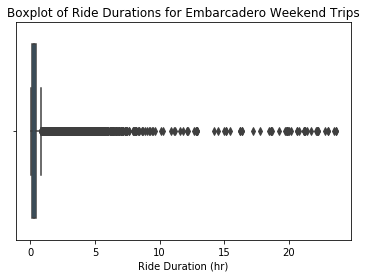

In [65]:
ax = sns.boxplot(embarcadero_weekend_trips_hr)
ax.set(xlabel='Ride Duration (hr)', title = "Boxplot of Ride Durations for Embarcadero Weekend Trips");


**Descriptive Stats:**

In [66]:
embarcadero_weekend_trips_hr.describe()

count    16428.000000
mean         0.601582
std          1.408752
min          0.083333
25%          0.165556
50%          0.265833
75%          0.443333
max         23.624722
Name: duration_sec, dtype: float64

#### Non-Subscription Customers

A lot of the rides are under 30min (which would cost \\$2). Are customers keeping themselves to 30min because of the pricing? Is there another offer we could extend to them for pleasure rides on the weekends that would encourage people to take longer rides? Or attract new customers for pleasure rides on the weekends?

Approximately half of the rides (54,373 of the 110,341) are taken by non-subscription customers. 

In [67]:
%%bigquery weekend_trips_customers
SELECT *, 
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,      

FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Customer" AND duration_sec < 86400 AND duration_sec >= 300 AND EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7)
ORDER BY duration_sec DESC 




The 5 longest weekend trips are just under 24 hours long:

In [68]:
weekend_trips_customers.filter(["start_date", "end_date", "subscriber_type", "rush_hour", "start_station_name_correct", "end_station_name_correct"]).head()


,start_date,end_date,subscriber_type,start_station_name_correct,end_station_name_correct
0,2014-01-25 15:45:00+00:00,2014-01-26 15:44:00+00:00,Customer,Evelyn Park and Ride,Evelyn Park and Ride
1,2016-07-09 16:30:00+00:00,2016-07-10 16:28:00+00:00,Customer,2nd at Townsend,Washington at Kearny
2,2014-08-31 16:13:00+00:00,2014-09-01 16:09:00+00:00,Customer,Market at 10th,Market at 10th
3,2016-07-09 16:33:00+00:00,2016-07-10 16:28:00+00:00,Customer,2nd at Townsend,Washington at Kearny
4,2014-02-15 10:26:00+00:00,2014-02-16 10:19:00+00:00,Customer,Civic Center BART (7th at Market),Civic Center BART (7th at Market)


The 5 shortest are at 5min long (which is expected given that we eliminated trips under this duration). 

In [69]:
weekend_trips_customers.filter(["start_date", "end_date", "subscriber_type", "rush_hour", "start_station_name_correct", "end_station_name_correct"]).tail()


,start_date,end_date,subscriber_type,start_station_name_correct,end_station_name_correct
53362,2013-08-31 00:49:00+00:00,2013-08-31 00:54:00+00:00,Customer,MLK Library,SJSU - San Salvador at 9th
53363,2015-07-05 17:26:00+00:00,2015-07-05 17:31:00+00:00,Customer,Temporary Transbay Terminal (Howard at Beale),Mechanics Plaza (Market at Battery)
53364,2014-11-01 17:27:00+00:00,2014-11-01 17:32:00+00:00,Customer,Embarcadero at Bryant,Harry Bridges Plaza (Ferry Building)
53365,2014-05-31 18:38:00+00:00,2014-05-31 18:43:00+00:00,Customer,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building)
53366,2014-06-28 19:40:00+00:00,2014-06-28 19:45:00+00:00,Customer,2nd at Townsend,San Francisco Caltrain 2 (330 Townsend)


#### Proportion of rides that are subscribed versus non-subscribed customers for commuter trips and weekend trips

96% of typical commuter trips (under 45min) are taken by subscribers (calculated above) -- but only 45% of weekend trips are. It appears that there is a different type of rider on the weekends! 

Number of weekend trips:

In [70]:
%%bigquery 
SELECT COUNT(*), 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec < 86400 AND duration_sec > 300 AND EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7)


,f0_
0,97750


Number of weekend trips taken by Non-subscription riders:

In [71]:
%%bigquery
SELECT COUNT(*), 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE subscriber_type = "Subscriber" AND duration_sec < 86400 AND duration_sec >= 300 AND EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7)


,f0_
0,44476


Proportion of weekend trips taken by Non-subscription riders = 0.45 = 45%

In [72]:
44476/97750

0.454997442455243

#### Trip Durations

From the plot below we can see that most of the weekend trips taken by non-subscription customers are under one-half hour (demarcated by the vertical orange line).

In [73]:
# Pull out duration and convert to hours
weekend_trips_customers_hr = weekend_trips_customers["duration_sec"]/60/60


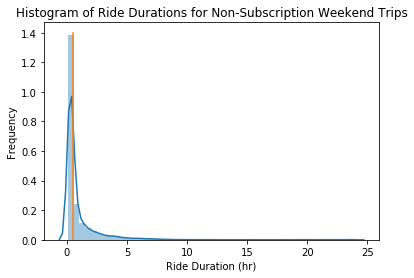

In [74]:
# plot
ax = sns.distplot(weekend_trips_customers_hr)
ax.set(xlabel='Ride Duration (hr)', ylabel = 'Frequency', title = "Histogram of Ride Durations for Non-Subscription Weekend Trips");
ax.plot([.5, .5], [0, 1.4]);


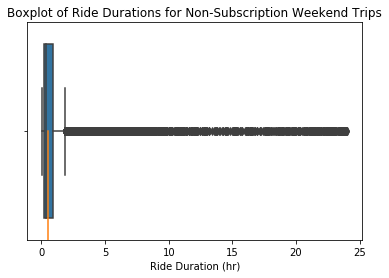

In [75]:
ax = sns.boxplot(weekend_trips_customers_hr)
ax.set(xlabel='Ride Duration (hr)', title = "Boxplot of Ride Durations for Non-Subscription Weekend Trips");
ax.plot([.5, .5], [0, 1], color = "tab:orange");

**Descriptive Stats:**

In [ ]:
weekend_trips_customers_hr.describe()

### Recommendation for Weekend Rider Offer

Currently, a customer without a subscription would pay \\$2 for a ride up to 30min and \\$3 per 15min after that. The ride durations seem to be mostly under 30min long -- is this because of this price structure? 

If a customer wanted to take a 45min ride on the weekend, they would pay \\$5. Two trips like this would cost them \\$10, three would cost \\$15. If they wanted to do 45min trips this often, they might as well pay for a subscription! 

There are many rides that last above 45min among these customers -- what if there would be some interest in longer pleasure rides on the weekends (closer to an hour)? 

One 1-hour ride would cost \\$8 -- perhaps people would be interested in taking a 1-hour ride a few times per month? With a subscription, if they wanted to take two 1-hour rides during the month it would cost them \\$21 total. 

Given these current offerings, I would recommend offering unlimited 1-hour weekend rides for \\$10 per month -- there are less available days than the usual subscription, but this is much lower in cost than if customers wanted to pay without any additional offer.  However, it is only a few dollars more than what someone would pay for a \\$1 ride anyway -- which might encourage someone to sign up for the subscription for just \\$2 more. 

### Extremely short rides: an error or an opportunity?

Do extremely short rides represent a pure data error -- or could they mark customers who attempted to rent a bike and could not complete the transaction? 


In [76]:
%%bigquery short_rides
SELECT start_date,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec <= 300
ORDER BY start_date ASC

In [77]:
short_rides.head()

,start_date,start_station_name_correct,end_station_name_correct
0,2013-08-29 09:08:00+00:00,2nd at South Park,2nd at South Park
1,2013-08-29 09:38:00+00:00,Mountain View City Hall,Mountain View City Hall
2,2013-08-29 09:41:00+00:00,Mountain View City Hall,Mountain View City Hall
3,2013-08-29 09:42:00+00:00,Commercial at Montgomery,Commercial at Montgomery
4,2013-08-29 10:16:00+00:00,Mountain View City Hall,Mountain View City Hall


In [78]:
short_rides.shape

(180079, 3)

Are some of these short rides with same start & end stations taken by new customers? Could there be a drop-off here for bringing in new customers? 

Most are **not** taken with the same start & end stations -- one follow up analysis to this one would be to examine whether the distances between those stations are bikeable in such a short time (perhaps by combining these data with data from Google maps).

In [79]:
%%bigquery short_rides_same_station
SELECT start_date,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
       EXTRACT(YEAR FROM start_date) AS start_year
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec <= 300 AND start_station_id = end_station_id 
ORDER BY start_date ASC

In [80]:
short_rides_same_station.shape

(4334, 4)

In [81]:
%%bigquery short_rides_same_station_customers
SELECT start_date,
        CASE 
           WHEN start_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN start_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN start_station_id = 21 THEN 'Sequoia Hospital'
           WHEN start_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN start_station_id = 25 THEN 'Broadway at Main'
           WHEN start_station_id = 80 THEN 'San Jose Government Center'
           WHEN start_station_id = 47 THEN 'Post at Kearny'
           WHEN start_station_id = 46 THEN 'Washington at Kearny'
           WHEN start_station_id = 83 THEN 'Mezes Park'
           WHEN start_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE start_station_name
           END AS start_station_name_correct,
        CASE WHEN end_station_id = 30 THEN 'Evelyn Park and Ride' 
           WHEN end_station_id = 26 THEN 'Redwood City Medical Center'
           WHEN end_station_id = 21 THEN 'Sequoia Hospital'
           WHEN end_station_id = 33 THEN 'Rengstorff Avenue / California Street'
           WHEN end_station_id = 25 THEN 'Broadway at Main'
           WHEN end_station_id = 80 THEN 'San Jose Government Center'
           WHEN end_station_id = 47 THEN 'Post at Kearny'
           WHEN end_station_id = 46 THEN 'Washington at Kearny'
           WHEN end_station_id = 83 THEN 'Mezes Park'
           WHEN end_station_id = 88 THEN '5th St at E. San Salvador St'
           ELSE end_station_name
           END AS end_station_name_correct,
       EXTRACT(YEAR FROM start_date) AS start_year
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec <= 300 AND start_station_id = end_station_id AND subscriber_type = "Customer"
ORDER BY start_date ASC

In [82]:
short_rides_same_station_customers.shape

(1438, 4)

Proportion of rides that are under 5min with same start & end station taken by non-subscribed customers = 0.33 = 33%

In [83]:
1438/4334

0.33179510844485466

Does it seem like this drop-off has changed over time (suggesting that Lyft bikes already addressed potential user issues)?

In [84]:
short_rides_customers_by_year = pd.value_counts(short_rides_same_station_customers["start_year"]).to_frame().sort_index().reset_index()


Number of short rides that are taken by non-subscribed customers, by year:

In [85]:
short_rides_customers_by_year

,index,start_year
0,2013,236
1,2014,508
2,2015,435
3,2016,259


Does this change in number of these short rides just reflect changes in overall ridership? The proportion that are taken by customers versus subscribers has increased over time (from 30% in 2013 to 36% in 2016). This suggests that either it has gotten harder for new customers to correctly start a ride, or that subscribers have had an increasingly easy time. It's hard to say but addressing user experience issues will undoubtedly provide a benefit either way (for riders and perhaps also for profits). 

In [86]:
short_rides_by_year = pd.value_counts(short_rides_same_station["start_year"]).to_frame().sort_index().reset_index()


Number of short rides, by year:

In [88]:
short_rides_by_year

,index,start_year
0,2013,793
1,2014,1520
2,2015,1299
3,2016,722


Proportion of short rides that are taken by non-subscribed customers compared to short rides over all, by year:

In [87]:
short_rides_customers_by_year["start_year"]/short_rides_by_year["start_year"]

0    0.297604
1    0.334211
2    0.334873
3    0.358726
Name: start_year, dtype: float64

### Recommendation for addressing issues of new customers

Since one-third of these short rides with the same start and end stations are taken by customers who are either new or don't use the bikes a lot (since they are not subscribers), there could be a usability issue with the bikes that could be addressed with user-experience research. Since the proportion of these compared to subscribed customers has increased over time, it appears that there is an existing usability issue that has not been addressed in previous iterations of the platform (or that subscribers have had an increasingly easy time of it compared to non-subscribed customers over time). I would recommend that Lyft bikes invest in some user experience research to uncover whether there is something preventing new potential customers from going through with their rides -- or if this is just an anomaly in the data.

## Appendix: Supplemental Data Processing Notes

This section provides additional information about some of the data processing and cleaning decisions.

We don't have any obviously missing data (any Nas) to fill in. This does not mean that the data are complete -- some data could have been filled in with a default value. 

In [89]:
%%bigquery bikeshare_trips
SELECT *,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`

Executing query with job ID: 3521fce3-8d72-4f77-9da5-5b9950568e77
Query executing: 0.54s

In [90]:
percent_missing = bikeshare_trips.isnull().sum() * 100 / len(bikeshare_trips)
missing_value_df = pd.DataFrame({'column_name': bikeshare_trips.columns,
                                 'percent_missing': percent_missing})

In [91]:
missing_value_df

,column_name,percent_missing
trip_id,trip_id,0.0
duration_sec,duration_sec,0.0
start_date,start_date,0.0
start_station_name,start_station_name,0.0
start_station_id,start_station_id,0.0
end_date,end_date,0.0
end_station_name,end_station_name,0.0
end_station_id,end_station_id,0.0
bike_number,bike_number,0.0
zip_code,zip_code,0.0


#### Further data cleaning

##### Check station names & ids

Are station names correct? Should we rely mainly on the IDs? 

In [92]:
%%bigquery results
SELECT *,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (2, 3, 4, 5, 6) AND ((EXTRACT(HOUR FROM start_date) >= 7 AND EXTRACT(HOUR FROM start_date) <= 9) OR (EXTRACT(HOUR FROM start_date) >= 16 AND EXTRACT(HOUR FROM start_date) <= 18)) THEN "Rush"
           ELSE "Not Rush"
           END AS rush_hour,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE duration_sec < 86400 AND NOT (duration_sec < 300 AND start_station_id = end_station_id)

In [93]:
len(results["start_station_id"].unique())

74

In [ ]:
len(results["start_station_id"].unique()) == len(results["end_station_id"].unique())

True

In [ ]:
len(results["start_station_name"].unique())

84

In [ ]:
len(results["start_station_name"].unique()) == len(results["end_station_name"].unique())

True

It looks like there are more names than IDs -- and that the start & end station ids/names are the same.
Let's pull out the ones with issues.

In [ ]:
# initialize list of ids
ids = results["start_station_id"].unique()
# initialize empty list to store problem IDs
id_issues = []

# loop through IDs and add problem IDs to list
for i in range(0, len(ids)):
    if len(results["start_station_name"][results["start_station_id"] == ids[i]].unique()) > 1:
        id_issues.append(ids[i])   

Let's look at the station names attached to IDs with multiple names. 

In [ ]:
for i in range(0, len(id_issues)):
    print(results["start_station_name"][results["start_station_id"] == id_issues[i]].unique())

['Mezes' 'Mezes Park']
['Kaiser Hospital' 'Redwood City Medical Center']
['Sequoia Hospital' 'Franklin at Maple']
['San Jose Government Center' 'Santa Clara County Civic Center']
['5th S at E. San Salvador St' '5th St at E. San Salvador St']
['Rengstorff Avenue / California Street'
 'Charleston Park/ North Bayshore Area']
['Broadway at Main' 'Stanford in Redwood City']
['Post at Kearny' 'Post at Kearney']
['Washington at Kearny' 'Washington at Kearney']
['Middlefield Light Rail Station' 'Evelyn Park and Ride']


By looking up these station names on Google, it appears that these discrepancies reflect minor spelling errors or identifying the same general area with a different name. 

This exploration was the basis for corrections I made in my SQL query. Some were minor spelling issues. For others, it was a correction based on station proximity -- all of the station locations for each ID were close enough that I chose one of the two names for the station arbitrarily based on the map. 